# Spam mail Detection

In [ ]:
# importing the labraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [ ]:
# imprting the data
df = pd.read_csv('mail_data.csv')

In [ ]:
# seeig the first 5 rows
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# shape if the data
df.shape

(5572, 2)

In [ ]:
# info the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


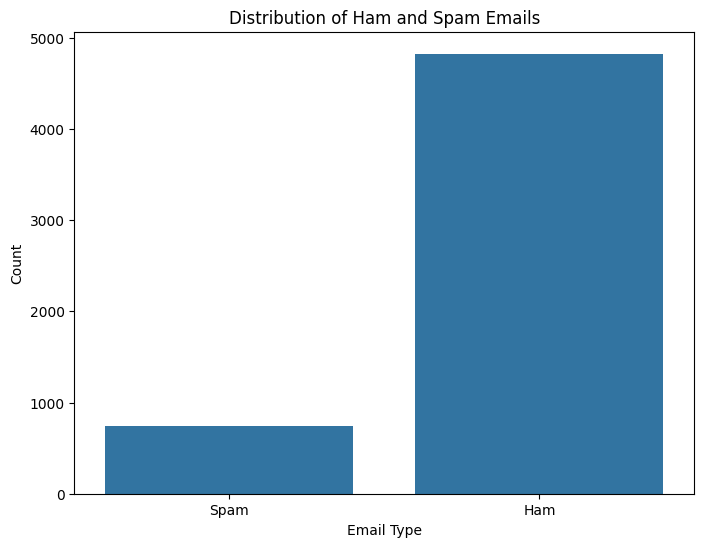

In [ ]:
 #plotting the bar graph for the ham and spam mail

ham_count = df['Category'].value_counts()[1]
spam_count = df['Category'].value_counts()[0]

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Category', data=df)
plt.title('Distribution of Ham and Spam Emails')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.xticks([0, 1], ['Spam', 'Ham'])  # Replace 0 and 1 with your actual labels
plt.show()


# Create a pie chart
labels = ['Ham', 'Spam']
sizes = [ham_count, spam_count]
colors = ['#66b3ff', '#ff9999']  # Choose your desired colors



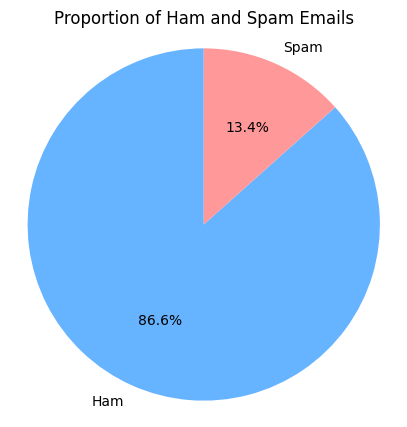

In [ ]:
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Ham and Spam Emails')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
# label spam as 0; ham mail as 1;

df.loc[df['Category'] == 'spam', 'Category',] = 0

df.loc[df['Category'] == 'ham', 'Category',] = 1

In [ ]:
# seprating the data as text asn labels

X = df['Message']
Y = df['Category']

In [ ]:
X

,Message
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will ü b going to esplanade fr home?
5569,"Pity, * was in mood for that. So...any other s..."
5570,The guy did some bitching but I acted like i'd...


In [ ]:
Y

,Category
0,1
1,1
2,0
3,1
4,1
...,...
5567,0
5568,1
5569,1
5570,1


In [ ]:
# spelitiing the data into trin and test split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [ ]:
# checking the shape
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [ ]:
# transfrom the text data to feature vectors

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)

X_train_feature = feature_extraction.fit_transform(X_train)
X_test_feature = feature_extraction.transform(X_test)

# convert the y_train and y_test to numerical

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [ ]:
print(X_train[:2])

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
Name: Message, dtype: object


In [ ]:
print(X_train_feature[:2])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 17 stored elements and shape (2, 7431)>
  Coords	Values
  (0, 2329)	0.38783870336935383
  (0, 3811)	0.34780165336891333
  (0, 2224)	0.413103377943378
  (0, 4456)	0.4168658090846482
  (0, 5413)	0.6198254967574347
  (1, 3811)	0.17419952275504033
  (1, 3046)	0.2503712792613518
  (1, 1991)	0.33036995955537024
  (1, 2956)	0.33036995955537024
  (1, 2758)	0.3226407885943799
  (1, 1839)	0.2784903590561455
  (1, 918)	0.22871581159877646
  (1, 2746)	0.3398297002864083
  (1, 2957)	0.3398297002864083
  (1, 3325)	0.31610586766078863
  (1, 3185)	0.29694482957694585
  (1, 4080)	0.18880584110891163


In [ ]:
# Training th model

model = LogisticRegression()

model.fit(X_train_feature, Y_train)

LogisticRegression()

In [ ]:
# evaluating the model

# for the traing data
prediction_on_training_data = model.predict(X_train_feature)
accuracy_on_training_data = metrics.accuracy_score(Y_train, prediction_on_training_data)

In [ ]:
print('Accuarcy on training data:', accuracy_on_training_data)

Accuarcy on training data: 0.9676912721561588


In [ ]:
# predictoin on test data
prediction_on_test_data = model.predict(X_test_feature)
accuracy_on_test_data = metrics.accuracy_score(Y_test, prediction_on_test_data) # Use prediction_on_test_data instead of prediction_on_training_data

In [ ]:
print('Accuarcy on training data:', accuracy_on_test_data)

Accuarcy on training data: 0.9668161434977578


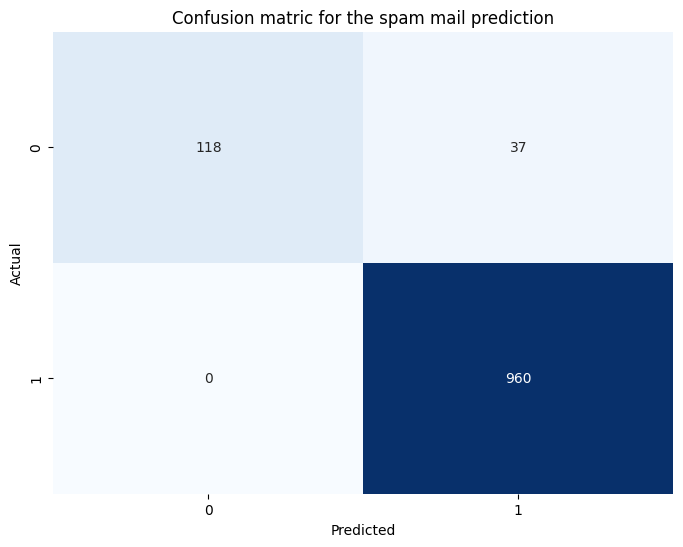

In [ ]:
# confussion matrix

conf_matrix = confusion_matrix(Y_test, prediction_on_test_data)

# print("Confusion Matrix:")
# print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matric for the spam mail prediction")
plt.show()

In [ ]:
# predictive system

input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

[1]
Ham mail
